##### **IE403.E31.CN1.CNTT - Khai Thác Dữ Liệu Và Truyền Thông Xã Hội - Giảng viên: ThS. Mai Xuân Hùng**

### **ĐỒ ÁN CUỐI KỲ**

### **Ứng Dụng Các Thuật Toán Khai Thác Dữ Liệu Trong Việc Dự Báo Phân Bổ Hàng Hóa Bán Lẻ**

**Nhóm 12**
| STT | Họ và Tên                | MSSV      |
|-----|--------------------------|-----------|
|  1  | Vũ Ngọc Huyền            | 23210228  |
|  2  | Lê Hàn Trúc Chi          | 23210200  |
|  3  | Lưu Phương Thanh         | 23210276  |
|  4  | Võ Minh Dương            | 23210214  |
|  5  | Nguyễn Vũ Kim Ngân       | 23210214  |


## Tổng quan và mục tiêu

Đồ án tập trung vào việc ứng dụng khai thác dữ liệu trong quản lý tồn kho tại các cửa hàng bán lẻ. Bằng cách sử dụng các kỹ thuật học máy cả không giám sát và có giám sát để giải quyết hai bài toán chính, nhóm đưa ra phân tích tình hình kinh doanh hiện tại và dự báo việc phân bổ hàng hóa một cách hợp lý, góp phần tối ưu doanh thu cho cửa hàng.

## Các kỹ thuật được sử dụng
1.  **Gom cụm (Clustering) bằng K-Means**: Sử dụng thuật toán K-Means để phân nhóm các sản phẩm có đặc điểm tương đồng (như giá cả, nhu cầu, khuyến mãi), từ đó xác định các chiến lược kinh doanh phù hợp cho từng nhóm sản phẩm.
2.  **Phân lớp (Classification) bằng Naive Bayes**: Áp dụng mô hình Naive Bayes để dự đoán khả năng bán chạy của sản phẩm dựa trên các yếu tố như danh mục sản phẩm, khu vực, thời tiết và chương trình khuyến mãi.


## Mục lục
1. Cài đặt thư viện
2. Chuẩn bị dữ liệu
3. Khám phá dữ liệu
    - 3.1. Hiểu cấu trúc dữ liệu
    - 3.2. Kiểm tra dữ liệu
    - 3.3. Trực quan hóa dữ liệu
4. Tiền xử lý dữ liệu
    - 4.1. Xử lý các biến ngoại lai (Outliners)
    - 4.2. Kỹ thuật đặc trưng (Feature Engineering)
5. Áp dụng các thuật toán khai thác dữ liệu
   - 5.1. Gom cụm bằng K-Means
        - 5.1.1. Xây dựng mô hình
        - 5.1.2. Xác định số cụm (k)
        - 5.1.3. Trực quan hóa các cụm
        - 5.1.4. Kết quả gom cụm
        - 5.1.5. Phân tích chuyên sâu (bổ sung)
   - 5.2. Phân lớp bằng Naive Bayes
        - 5.2.1. Xây dựng mô hình
        - 5.2.2. Đánh giá mô hình
6. Kết luận








# 1. Cài đặt thư viện


Tiến hành cài đặt các thư viện cần thiết cho quá trình phân tích và khai thác dữ liệu


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# 2. Chuẩn bị dữ liệu


Chuẩn bị và tải dữ liệu sử dụng để thực hiện phân tích.


In [33]:
# Tải dữ liệu
df = pd.read_csv('retail_store_inventory.csv')

# Hiển thị 5 dòng đầu tiên
df.head()


Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

# 3. Khám phá dữ liệu


Khám phá dữ liệu để hiểu rõ hơn về cấu trúc, đặc điểm và các thông tin quan trọng của bộ dữ liệu.


## 3.1. Hiểu cấu trúc dữ liệu


In [34]:
# Tổng quan về dữ liệu
print("Thông tin chung về dữ liệu:")
df.info()


Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), 

### Mô tả dữ liệu

- **Date**: Ngày bán hàng.
- **Store ID**: ID của cửa hàng.
- **Product ID**: ID của sản phẩm.
- **Category**: Danh mục sản phẩm.
- **Region**: Khu vực của cửa hàng.
- **Inventory Level**: Mức tồn kho của sản phẩm tại cửa hàng vào ngày đó.
- **Units Sold**: Số lượng sản phẩm đã bán trong ngày.
- **Units Ordered**: Số lượng sản phẩm đã đặt hàng để bổ sung tồn kho.
- **Demand**: Đại diện cho dự báo nhu cầu cho sản phẩm tại cửa hàng vào một ngày cụ thể. Đây không phải là số lượng bán thực tế ('Units Sold'), mà là một giá trị ước tính hoặc dự đoán về số lượng sản lượng mà khách hàng có thể sẽ mua.
- **Price**: Giá bán của sản phẩm.
- **Discount**: Mức chiết khấu áp dụng cho sản phẩm.
- **Weather Condition**: Điều kiện thời tiết vào ngày đó.
- **Holiday/Promotion**: Cho biết có ngày lễ hoặc chương trình khuyến mãi nào diễn ra hay không (1 nếu có, 0 nếu không).
- **Competitor Pricing**: Giá của sản phẩm tương tự từ đối thủ cạnh tranh.
- **Seasonality**: Mùa trong năm (ví dụ: Xuân, Hạ, Thu, Đông).


In [35]:
# Chuẩn hóa tên cột
df = df.rename(columns={'Inventory Level': 'Inventory',
                        'Units Sold': 'Sales',
                        'Units Ordered': 'Orders',
                        'Demand Forecast': 'Demand',
                        'Weather Condition': 'Weather',
                        'Holiday/Promotion': 'Promotion',
                        'Competitor Pricing': 'Competitor Price'})
df.head()


Date Store ID Product ID     Category Region  Inventory  Sales  \
0  2022-01-01     S001      P0001    Groceries  North        231    127   
1  2022-01-01     S001      P0002         Toys  South        204    150   
2  2022-01-01     S001      P0003         Toys   West        102     65   
3  2022-01-01     S001      P0004         Toys  North        469     61   
4  2022-01-01     S001      P0005  Electronics   East        166     14   

   Orders  Demand  Price  Discount Weather  Promotion  Competitor Price  \
0      55  135.47  33.50        20   Rainy          0             29.69   
1      66  144.04  63.01        20   Sunny          0             66.16   
2      51   74.02  27.99        10   Sunny          1             31.32   
3     164   62.18  32.72        10  Cloudy          1             34.74   
4     135    9.26  73.64         0   Sunny          0             68.95   

  Seasonality  
0      Autumn  
1      Autumn  
2      Summer  
3      Autumn  
4      Summer

## 3.2. Kiểm tra dữ liệu


In [36]:
# Kiểm tra dữ liệu thiếu
print("\nKiểm tra dữ liệu thiếu:")
df.isnull().sum()



Kiểm tra dữ liệu thiếu:


Date                0
Store ID            0
Product ID          0
Category            0
Region              0
Inventory           0
Sales               0
Orders              0
Demand              0
Price               0
Discount            0
Weather             0
Promotion           0
Competitor Price    0
Seasonality         0
dtype: int64

In [37]:
# Kiểm tra dữ liệu bị trùng lặp
df.duplicated().sum()


np.int64(0)

## 3.3. Trực quan hóa dữ liệu


In [38]:
# Mô tả thống kê
print("\nMô tả thống kê của dữ liệu:")
df.describe()



Mô tả thống kê của dữ liệu:


Inventory         Sales        Orders        Demand         Price  \
count  73100.000000  73100.000000  73100.000000  73100.000000  73100.000000   
mean     274.469877    136.464870    110.004473    141.494720     55.135108   
std      129.949514    108.919406     52.277448    109.254076     26.021945   
min       50.000000      0.000000     20.000000     -9.990000     10.000000   
25%      162.000000     49.000000     65.000000     53.670000     32.650000   
50%      273.000000    107.000000    110.000000    113.015000     55.050000   
75%      387.000000    203.000000    155.000000    208.052500     77.860000   
max      500.000000    499.000000    200.000000    518.550000    100.000000   

           Discount     Promotion  Competitor Price  
count  73100.000000  73100.000000      73100.000000  
mean      10.009508      0.497305         55.146077  
std        7.083746      0.499996         26.191408  
min        0.000000      0.000000          5.030000  
25%        5.000000      0.000000         32.680000  
50%       10.000000      0.000000         55.010000  
75%       15.000000      1.000000         77.820000  
max       20.000000      1.000000        104.940000

Bảng này cung cấp các thông tin như số lượng quan sát (count), giá trị trung bình (mean), độ lệch chuẩn (std), giá trị nhỏ nhất (min), các phân vị (25%, 50%, 75%) và giá trị lớn nhất (max) cho từng biến số. 

Thông qua bảng này, ta có thể nhận biết được phân bố dữ liệu, phát hiện các giá trị bất thường (outlier), cũng như so sánh mức độ biến động giữa các biến. 
Ví dụ, biến 'Sales' có giá trị trung bình là 136.46, độ lệch chuẩn khá lớn (108.92), cho thấy doanh số giữa các sản phẩm/cửa hàng có sự khác biệt đáng kể. 

Ngoài ra, các biến như 'Discount' và 'Promotion' cũng có thể giúp phân tích tác động của các chương trình khuyến mãi đến doanh số bán hàng.


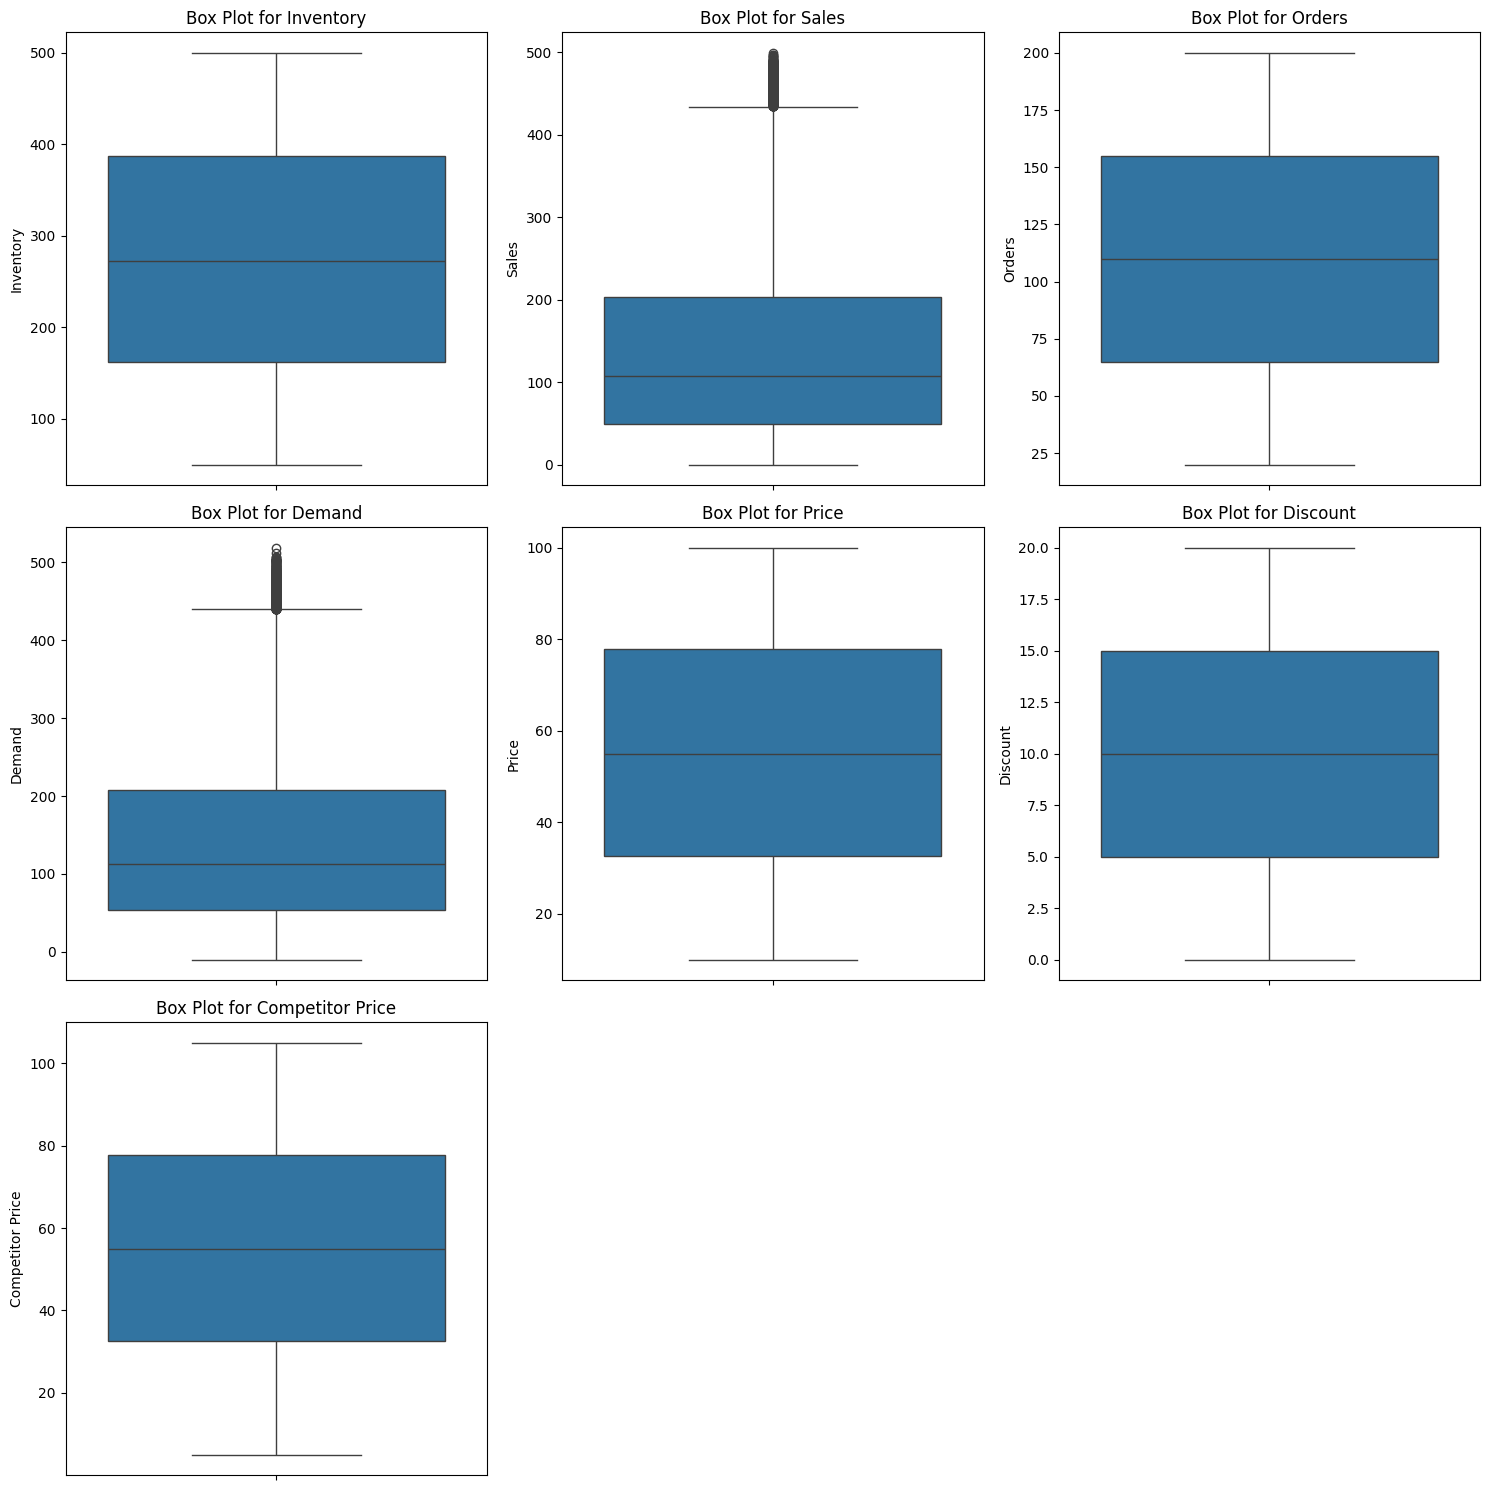

In [39]:
# Vẽ biểu đồ boxplot để phát hiện các giá trị bất thường
numerical_columns = ['Inventory','Sales','Orders','Demand','Price','Discount','Competitor Price']

# Tính số hàng và cột phù hợp với số lượng biến
import math
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(ax=axes[i], y=df[col].dropna())
    axes[i].set_title(f"Box Plot for {col}")
    axes[i].set_ylabel(col)

# Ẩn các subplot thừa nếu có
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Nhận xét về kết quả biểu đồ boxplot của từng biến số
- Inventory: Mức tồn kho trung bình khoảng 200, dao động từ 100 đến 500. Giá trị ngoại lệ được quan sát thấy khi mức tồn kho trên 500. Điều này cho thấy một số cửa hàng có tồn kho rất cao so với mặt bằng chung.
- Sales: Phần lớn giá trị Sales tập trung ở mức thấp, trung bình khoảng 100, dao động từ 50 đến 200. Có những giá trị ngoại lệ với doanh số trên 200, phản ánh một số sản phẩm/cửa hàng có doanh số vượt trội.
- Orders: Số lượng Orders có xu hướng tương tự Sales, trung bình khoảng 100, dao động từ 50 đến 200. Nhiều giá trị ngoại lai ở phía trên cho thấy sự chênh lệch lớn giữa các sản phẩm/cửa hàng. phản ánh nhu cầu cao hoặc việc bổ sung hàng tồn kho.
- Demand: Giá trị trung bình khoảng 140, độ lệch chuẩn 109.25, giá trị tối thiểu là -9.99 (có giá trị âm), tối đa 518.55. Có một số outlier ở cả hai phía (âm và dương), cần kiểm tra lại các giá trị âm vì có thể là dữ liệu bất thường hoặc lỗi nhập liệu.
- Price: Giá sản phẩm phân bố khá rộng, trung bình khoảng 55. Có những giá trị ngoại lệ với giá trên 70, điều này có thể phản ánh sự đa dạng về phân khúc sản phẩm.
- Discount: Mức giảm giá trung bình khoảng 10%, dao động từ 0 đến 20%. Có những trường hợp ngoại lệ với mức giảm giá trên 20%, điều này có thể liên quan đến các chiến lược định giá cạnh tranh hoặc các đợt giảm giá thanh lý.
- Competitor Price: Giá trung bình của đối thủ cạnh tranh là khoảng 30, dao động từ 20 đến 60. Có những trường hợp ngoại lệ với giá của đối thủ cạnh tranh trên 60, điều này có thể cho thấy mức độ cạnh tranh cao hoặc sản phẩm cao cấp.

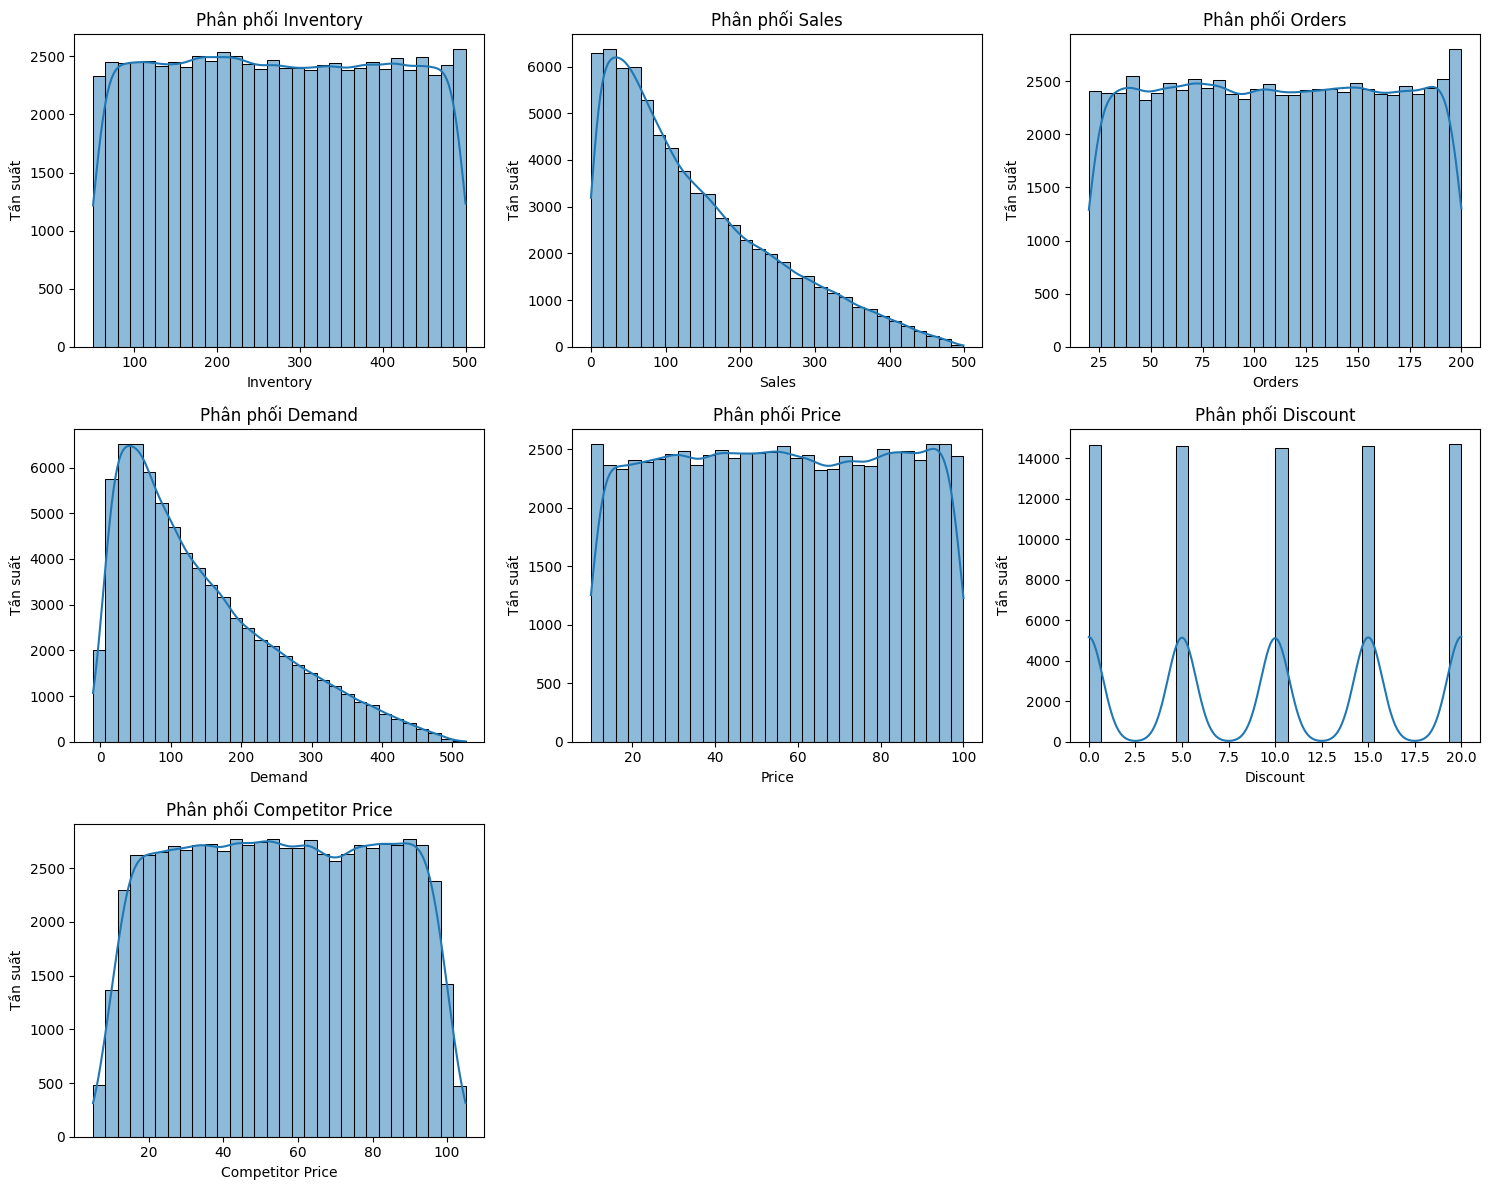

In [40]:
# Vẽ biểu đồ phân phối (histogram) cho các biến số
numerical_columns = ['Inventory','Sales','Orders','Demand','Price','Discount','Competitor Price']
import math
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col].dropna(), ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Phân phối {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tần suất')

# Ẩn các subplot thừa nếu có
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



Biểu đồ cho thấy phân phối của các biến số trong bộ dữ liệu. 

# 4. Tiền xử lý dữ liệu


Ở phần này, các bước tiền xử lý dữ liệu được thực hiện nhằm chuẩn bị dữ liệu tốt hơn cho các phân tích và mô hình dự báo tiếp theo, bao gồm:
- Kiểm tra và xử lý các giá trị ngoại lai (outliers) trong dữ liệu.
- Xây dựng các đặc trưng mới (feature engineering) như: tách thông tin thời gian từ cột Date, tạo biến mục tiêu cho bài toán phân lớp, và tạo đặc trưng về mùa (Seasonality).

## 4.1. Xử lý các biến ngoại lai (outliers)


In [41]:
# Kiểm tra các giá trị âm hoặc vô lý
print("Kiểm tra các giá trị âm hoặc vô lý:")
print(f"Số lượng Price < 0: {(df['Price'] < 0).sum()}")
print(f"Số lượng Sales < 0: {(df['Sales'] < 0).sum()}")

# Xử lý nếu có (ví dụ: loại bỏ)
# df = df[df['Price'] >= 0]
# df = df[df['Sales'] >= 0]
# Trong trường hợp này, dữ liệu có vẻ sạch, không có giá trị âm.


Kiểm tra các giá trị âm hoặc vô lý:
Số lượng Price < 0: 0
Số lượng Sales < 0: 0


## 4.2. Kỹ thuật đặc trưng (Feature Engineering)


In [42]:
# 1. Xử lý cột Date
df['Date'] = pd.to_datetime(df['Date'])

# Tạo các cột mới từ Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

print("Đã tạo các cột thời gian mới:")
df[['Date', 'Year', 'Month', 'DayOfWeek', 'WeekOfYear']].head()


Đã tạo các cột thời gian mới:


Date  Year  Month  DayOfWeek  WeekOfYear
0 2022-01-01  2022      1          5          52
1 2022-01-01  2022      1          5          52
2 2022-01-01  2022      1          5          52
3 2022-01-01  2022      1          5          52
4 2022-01-01  2022      1          5          52

In [43]:
# 2. Tạo biến mục tiêu cho bài toán phân lớp
# Xác định ngưỡng (trung vị của Sales)
median_units_sold = df['Sales'].median()
print(f"Giá trị trung vị của Sales: {median_units_sold}")

# Tạo cột High_Sales_Potential
df['High_Sales_Potential'] = (df['Sales'] > median_units_sold).astype(int)

print("\nĐã tạo cột mục tiêu 'High_Sales_Potential':")
df[['Sales', 'High_Sales_Potential']].head(10)


Giá trị trung vị của Sales: 107.0

Đã tạo cột mục tiêu 'High_Sales_Potential':


Sales  High_Sales_Potential
0    127                     1
1    150                     1
2     65                     0
3     61                     0
4     14                     0
5    128                     1
6     97                     0
7    312                     1
8    175                     1
9     28                     0

In [44]:
# 3. Tạo đặc trưng Mùa (Seasonality)
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

print("\nĐã tạo cột 'Season':")
df[['Month', 'Season']].head()



Đã tạo cột 'Season':


Month  Season
0      1  Winter
1      1  Winter
2      1  Winter
3      1  Winter
4      1  Winter

# 5. Áp dụng các thuật toán khai thác dữ liệu

Trong phần này, nhóm sẽ áp dụng các thuật toán khai thác dữ liệu để phân tích và khám phá những thông tin tiềm ẩn trong bộ dữ liệu bán lẻ, từ đó đưa ra các nhận định hỗ trợ việc phân bổ hàng hóa hợp lý cho các cửa hàng.

Các kỹ thuật được sử dụng bao gồm:
- **Phân cụm bằng K-Means**: Áp dụng thuật toán K-Means để nhóm các sản phẩm có đặc điểm tương tự nhau.
- **Phân loại bằng Naive Bayes**: Sử dụng thuật toán Naive Bayes để dự đoán tiềm năng bán chạy của sản phẩm.


## 5.1. Gom cụm bằng K-Means


Mục tiêu của phần này là sử dụng thuật toán học máy không giám sát K-Means để tự động nhóm các sản phẩm có đặc điểm tương tự nhau. Bằng cách này, nhóm có thể khám phá các phân khúc hoặc chiến lược sản phẩm tiềm ẩn trong dữ liệu mà không cần gán nhãn trước, từ đó đưa ra các chiến lược kinh doanh phù hợp cho từng nhóm.


#### 5.1.1 Xây dựng mô hình


In [45]:
# Chọn các cột dữ liệu cho việc phân cụm
features_for_clustering = ['Demand', 'Price', 'Discount', 'Competitor Price']
X_cluster = df[features_for_clustering]

# Chuẩn hóa dữ liệu vì K-Means nhạy cảm với sự khác biệt về thang đo
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Dữ liệu đã được chuẩn hóa để chuẩn bị cho việc phân cụm.")


Dữ liệu đã được chuẩn hóa để chuẩn bị cho việc phân cụm.


#### 5.1.2. Xác định số cụm (k)
Để chọn được số cụm phù hợp nhất cho dữ liệu, nhóm sử dụng "Phương pháp Elbow". Ý tưởng là chạy K-Means với nhiều giá trị K khác nhau và tính tổng bình phương khoảng cách từ các điểm đến tâm cụm gần nhất (Inertia).


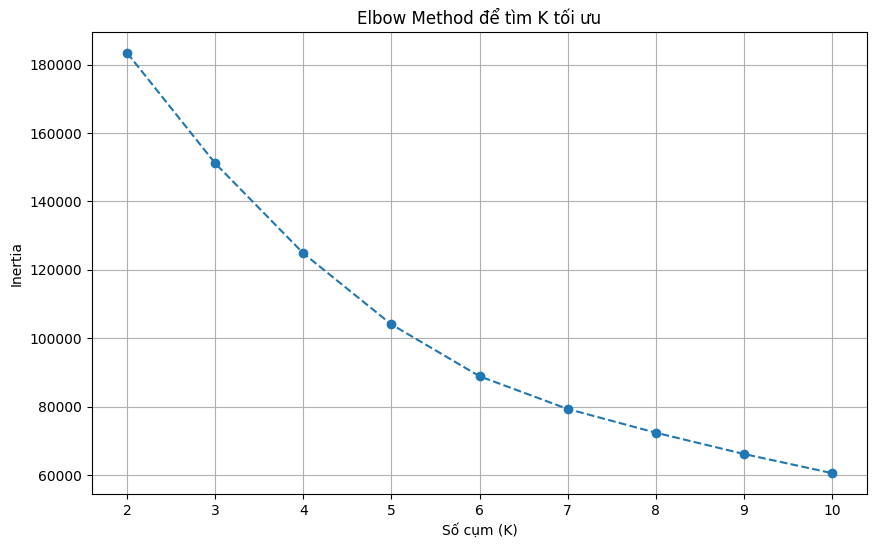

In [46]:
# Tìm K tối ưu bằng Elbow Method
inertia_values = []
k_range = range(2, 11)

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X_cluster_scaled)
    inertia_values.append(kmeans_test.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Số cụm (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm K tối ưu')
plt.grid(True)
plt.show()


**Nhận xét:** Dựa trên biểu đồ Elbow, ta thấy rằng đường cong bắt đầu thoải dần sau K=4 hoặc K=5. Điều này cho thấy việc tăng số cụm lên nữa không mang lại hiệu quả rõ rệt. Trong bài toán kinh doanh này, việc có 5 nhóm chiến lược sẽ giúp phân tích sâu hơn và chi tiết hơn. Do đó, nhóm sẽ chọn **K=5** cho mô hình cuối cùng.


In [47]:
# Chạy K-Means với K=5 đã chọn
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_cluster_scaled)

# Gán nhãn cụm vào DataFrame gốc để sử dụng cho các phân tích sau
df['Cluster'] = kmeans.labels_

print("Đã phân cụm thành công với K=5. Nhãn cụm đã được thêm vào DataFrame.")
df[['Product ID'] + features_for_clustering + ['Cluster']].head()


Đã phân cụm thành công với K=5. Nhãn cụm đã được thêm vào DataFrame.


Product ID  Demand  Price  Discount  Competitor Price  Cluster
0      P0001  135.47  33.50        20             29.69        1
1      P0002  144.04  63.01        20             66.16        3
2      P0003   74.02  27.99        10             31.32        0
3      P0004   62.18  32.72        10             34.74        0
4      P0005    9.26  73.64         0             68.95        4

#### 5.1.3. Trực quan hóa các cụm


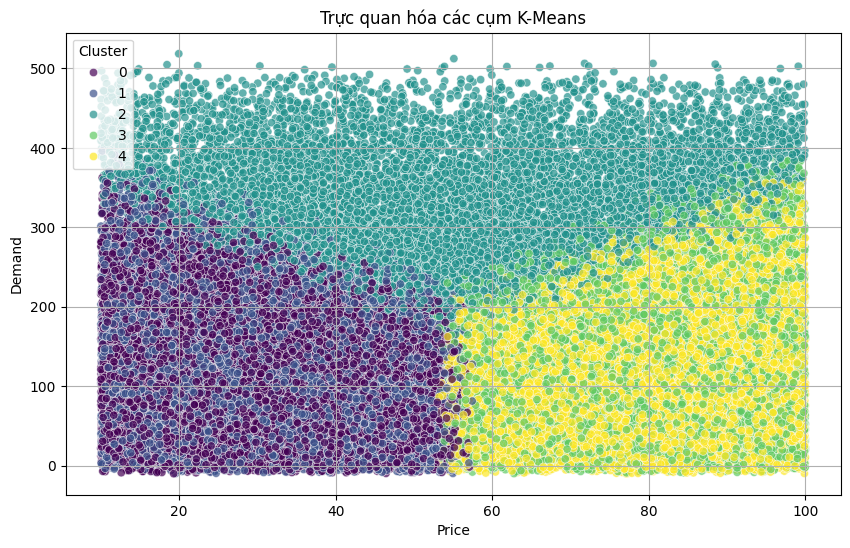

In [48]:
# Trực quan hóa các cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Demand', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Trực quan hóa các cụm K-Means')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [49]:
# Định lượng bằng Silhouette Score
# Chỉ số này đo lường mức độ tương đồng của một đối tượng với cụm của chính nó so với các cụm khác.
# Giá trị càng gần 1, việc phân cụm càng tốt.
silhouette_avg = silhouette_score(X_cluster_scaled, kmeans.labels_)
print(f"Chỉ số Silhouette Score: {silhouette_avg:.2f}")


Chỉ số Silhouette Score: 0.28


**Nhận xét:** Biểu đồ scatter plot cho thấy các cụm có sự phân tách tương đối, đặc biệt là theo chiều giá cả (Price). Chỉ số Silhouette Score là 0.28, đây là một con số chấp nhận được, cho thấy các điểm trong cùng một cụm có tính liên kết và cách biệt với các cụm khác ở mức độ vừa phải.


#### 5.1.4. Kết quả gom cụm


In [50]:
# Tính giá trị trung bình của các đặc trưng cho mỗi cụm để hiểu rõ đặc điểm của chúng
cluster_analysis = df.groupby('Cluster')[features_for_clustering].mean()

print("Thống kê đặc điểm trung bình của từng cụm:")
cluster_analysis


Thống kê đặc điểm trung bình của từng cụm:


Demand      Price   Discount  Competitor Price
Cluster                                                    
0        105.488696  31.797270   4.853595         31.681388
1        113.306357  31.744169  17.588190         31.659185
2        332.021579  54.572724   9.358439         54.583187
3        115.883289  78.525231  17.585029         78.649232
4        106.084986  78.865655   4.839585         78.992200

##### Diễn giải chi tiết các cụm

Dựa vào bảng phân tích giá trị trung bình trên, nhóm có thể liệt kê từng cụm như sau.

*   **Cụm 0: "Sản phẩm giá rẻ, cạnh tranh cao"**
    *   **Đặc điểm:** Giá bán thấp, giá đối thủ cạnh tranh cũng thấp, đi kèm với mức giảm giá (discount) đáng kể. Nhu cầu (demand) cho nhóm này ở mức trung bình khá.
    *   **Chiến lược:** Đây là nhóm sản phẩm phổ thông, cạnh tranh chủ yếu bằng giá. Chiến lược kinh doanh phù hợp là bán số lượng lớn, tối ưu hóa chi phí và các chương trình khuyến mãi ngắn hạn để thu hút khách hàng.

*   **Cụm 1: "Sản phẩm giá cao, nhu cầu lớn"**
    *   **Đặc điểm:** Giá bán cao, giá đối thủ cũng cao, nhưng mức giảm giá lại thấp. Đáng chú ý, đây là nhóm có nhu cầu dự báo (demand) cao nhất.
    *   **Chiến lược:** Đây có thể là những sản phẩm chủ lực, thương hiệu mạnh hoặc có tính độc quyền. Chiến lược nên tập trung vào việc duy trì chất lượng, dịch vụ khách hàng và đảm bảo luôn đủ hàng tồn kho để đáp ứng nhu cầu lớn.

*   **Cụm 2: "Sản phẩm tầm trung, cân bằng"**
    *   **Đặc điểm:** Tất cả các chỉ số (giá bán, giá đối thủ, giảm giá, nhu cầu) đều ở mức trung bình, không có gì quá nổi bật.
    *   **Chiến lược:** Đây là nhóm sản phẩm an toàn, ổn định. Chiến lược có thể là duy trì vị thế hiện tại, theo dõi sát sao biến động của thị trường và đối thủ để có những điều chỉnh kịp thời.

*   **Cụm 3: "Sản phẩm cao cấp, ít cạnh tranh về giá"**
    *   **Đặc điểm:** Giá bán và giá đối thủ đều rất cao (cao nhất trong các cụm), nhưng mức giảm giá lại không đáng kể. Nhu cầu cho nhóm này không quá cao.
    *   **Chiến lược:** Đây là phân khúc sản phẩm cao cấp, có thể là hàng xa xỉ hoặc đặc thù. Khách hàng của nhóm này ít nhạy cảm về giá. Chiến lược nên tập trung vào xây dựng thương hiệu, trải nghiệm khách hàng và marketing nhắm đến đối tượng mục tiêu cụ thể.

*   **Cụm 4: "Sản phẩm độc đáo, giá tốt"**
    *   **Đặc điểm:** Giá bán ở mức trung bình khá, nhưng giá của đối thủ lại cao hơn đáng kể. Mức giảm giá thấp và nhu cầu cũng ở mức khá.
    *   **Chiến lược:** Đây là nhóm sản phẩm có lợi thế cạnh tranh về giá so với đối thủ. Có thể công ty đang có một lợi thế về nguồn cung hoặc chi phí sản xuất. Chiến lược nên là truyền thông mạnh về "giá tốt nhất thị trường" để thu hút khách hàng từ đối thủ cạnh tranh.


#### 5.1.5. Phân tích chuyên sâu (bổ sung)

Ở phần này, nhóm đề xuất mở rộng phân tích chuyên sâu từ kết quả các cụm sản phẩm đã được phân nhóm bằng thuật toán phân cụm. 

Mục tiêu là hiểu rõ hơn về đặc điểm của từng cụm, từ đó đề xuất các chiến lược kinh doanh phù hợp cho từng nhóm sản phẩm dựa trên các yếu tố như giá bán, nhu cầu, mức giảm giá và giá của đối thủ cạnh tranh. 

Ngoài ra, nhóm cũng sẽ phân tích hiệu quả của các nhóm chiến lược này theo các yếu tố ngữ cảnh như khu vực, mùa vụ, chương trình khuyến mãi và điều kiện thời tiết để đưa ra các khuyến nghị tối ưu hóa hoạt động kinh doanh.


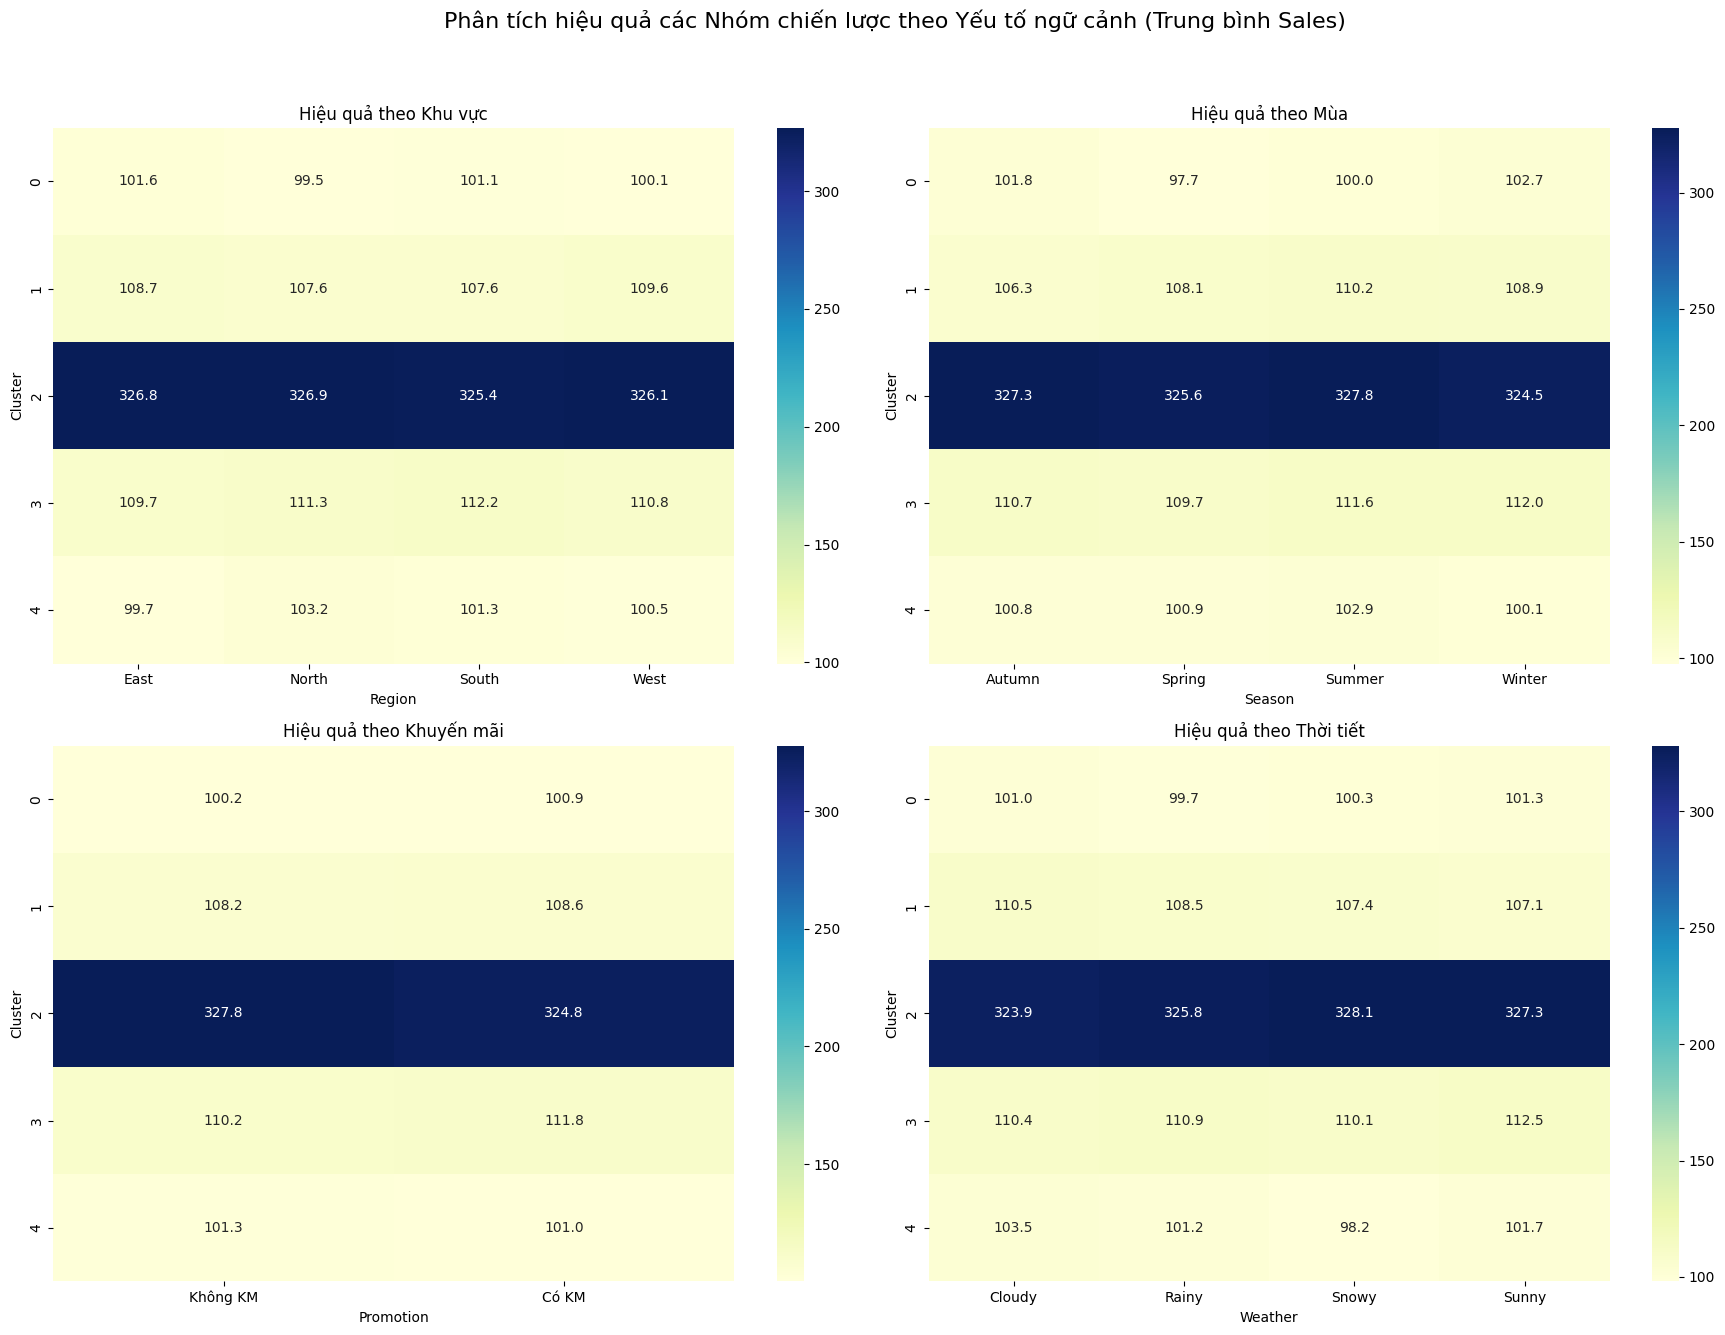

In [51]:
# Phân tích hiệu quả các nhóm chiến lược
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Phân tích hiệu quả các Nhóm chiến lược theo Yếu tố ngữ cảnh (Trung bình Sales)', fontsize=16)

# 1. Theo Khu vực (Region)
region_cluster_performance = df.groupby(['Cluster', 'Region'])['Sales'].mean().unstack()
sns.heatmap(region_cluster_performance, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[0, 0])
axes[0, 0].set_title('Hiệu quả theo Khu vực')

# 2. Theo Mùa (Season)
season_cluster_performance = df.groupby(['Cluster', 'Season'])['Sales'].mean().unstack()
sns.heatmap(season_cluster_performance, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[0, 1])
axes[0, 1].set_title('Hiệu quả theo Mùa')

# 3. Theo Khuyến mãi (Holiday/Promotion)
promo_cluster_performance = df.groupby(['Cluster', 'Promotion'])['Sales'].mean().unstack()
sns.heatmap(promo_cluster_performance, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1, 0])
axes[1, 0].set_title('Hiệu quả theo Khuyến mãi')
axes[1, 0].set_xticklabels(['Không KM', 'Có KM'])


# 4. Theo Thời tiết (Weather Condition)
weather_cluster_performance = df.groupby(['Cluster', 'Weather'])['Sales'].mean().unstack()
sns.heatmap(weather_cluster_performance, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1, 1])
axes[1, 1].set_title('Hiệu quả theo Thời tiết')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Nhận xét:** Các biểu đồ nhiệt cho thấy hiệu quả bán hàng của từng nhóm sản phẩm (cluster) thay đổi rõ rệt theo từng yếu tố ngữ cảnh. Cụ thể, có những nhóm sản phẩm đạt doanh số trung bình cao hơn hẳn tại một số khu vực, mùa vụ hoặc khi có chương trình khuyến mãi. Ngoài ra, điều kiện thời tiết cũng ảnh hưởng đến hiệu quả bán hàng của từng nhóm. Những thông tin này giúp doanh nghiệp xác định được nhóm sản phẩm nào nên tập trung phân phối, quảng bá tại từng khu vực, thời điểm hoặc trong các dịp khuyến mãi để tối ưu hóa doanh số.


## 5.2. Phân lớp bằng Naive Bayes


Trong phần này, nhóm sẽ sử dụng thuật toán phân loại Naive Bayes để dự đoán khả năng một sản phẩm trở thành sản phẩm bán chạy.

Mô hình sẽ được xây dựng dựa trên các đặc trưng về sản phẩm, yếu tố ngữ cảnh và kết quả phân cụm (Cluster) từ K-Means. Việc kết hợp thông tin về nhóm chiến lược (Cluster) giúp tăng độ chính xác cho dự đoán về tiềm năng bán chạy của sản phẩm.


### 5.2.1. Xây dựng mô hình


Các bước thực hiện: 
- Xác định biến mục tiêu và các đặc trưng đầu vào
- Mã hóa các biến phân loại
- Chia tập dữ liệu thành tập huấn luyện và kiểm tra
- Huấn luyện mô hình Naive Bayes


In [52]:
# Biến mục tiêu
y = df['High_Sales_Potential']

# Biến độc lập
features = ['Category', 'Region', 'Price', 'Discount', 'Promotion', 'Weather', 'DayOfWeek', 'Competitor Price', 'Season', 'Cluster']
X = df[features]

print("Tỉ lệ các lớp trong biến mục tiêu:")
print(df['High_Sales_Potential'].value_counts(normalize=True))


Tỉ lệ các lớp trong biến mục tiêu:
High_Sales_Potential
0    0.500109
1    0.499891
Name: proportion, dtype: float64


In [53]:
# Mã hóa biến phân loại (Categorical Encoding)
# Cluster là số nhưng bản chất là một loại category, nên cần được mã hóa
categorical_features = ['Category', 'Region', 'Weather', 'Season', 'Cluster']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit và transform các cột phân loại
encoded_features = pd.DataFrame(one_hot_encoder.fit_transform(X[categorical_features]))

# Lấy tên cột mới sau khi mã hóa
encoded_features.columns = one_hot_encoder.get_feature_names_out(categorical_features)

# Loại bỏ các cột phân loại gốc và nối các cột đã mã hóa
X_processed = X.drop(columns=categorical_features)
X_processed = pd.concat([X_processed.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)


# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)
print("\n5 dòng đầu của dữ liệu sau khi xử lý:")
X_processed.head()


Kích thước tập huấn luyện: (58480, 27)
Kích thước tập kiểm tra: (14620, 27)

5 dòng đầu của dữ liệu sau khi xử lý:


Price  Discount  Promotion  DayOfWeek  Competitor Price  Category_Clothing  \
0  33.50        20          0          5             29.69                0.0   
1  63.01        20          0          5             66.16                0.0   
2  27.99        10          1          5             31.32                0.0   
3  32.72        10          1          5             34.74                0.0   
4  73.64         0          0          5             68.95                0.0   

   Category_Electronics  Category_Furniture  Category_Groceries  \
0                   0.0                 0.0                 1.0   
1                   0.0                 0.0                 0.0   
2                   0.0                 0.0                 0.0   
3                   0.0                 0.0                 0.0   
4                   1.0                 0.0                 0.0   

   Category_Toys  ...  Weather_Sunny  Season_Autumn  Season_Spring  \
0            0.0  ...            0.0            0.0            0.0   
1            1.0  ...            1.0            0.0            0.0   
2            1.0  ...            1.0            0.0            0.0   
3            1.0  ...            0.0            0.0            0.0   
4            0.0  ...            1.0            0.0            0.0   

   Season_Summer  Season_Winter  Cluster_0  Cluster_1  Cluster_2  Cluster_3  \
0            0.0            1.0        0.0        1.0        0.0        0.0   
1            0.0            1.0        0.0        0.0        0.0        1.0   
2            0.0            1.0        1.0        0.0        0.0        0.0   
3            0.0            1.0        1.0        0.0        0.0        0.0   
4            0.0            1.0        0.0        0.0        0.0        0.0   

   Cluster_4  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  

[5 rows x 27 columns]

In [54]:
# Khởi tạo và huấn luyện mô hình Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Mô hình Naive Bayes đã được huấn luyện thành công!")


Mô hình Naive Bayes đã được huấn luyện thành công!


### 5.2.2. Đánh giá mô hình


Dánh giá mô hình và nhận xét hiệu quả dự đoán.

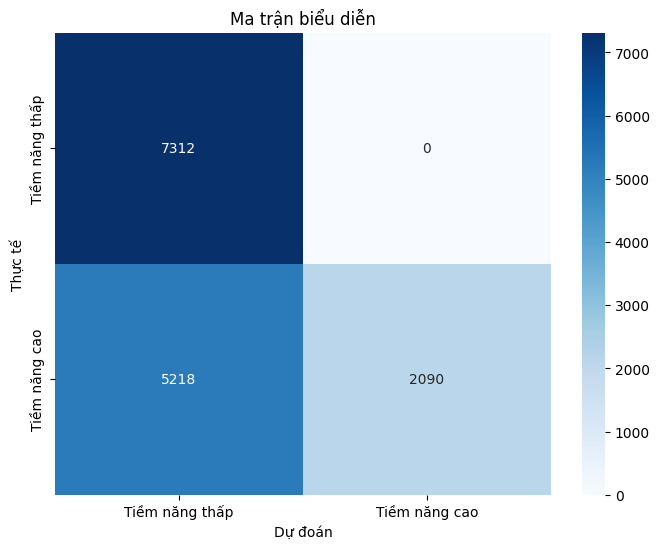

In [55]:
# Dự đoán trên tập test
y_pred = gnb.predict(X_test)

# Ma trận nhầm lẫn (Confusion Matrix) cho mô hình Naive Bayes phân loại tiềm năng bán hàng
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tiềm năng thấp', 'Tiềm năng cao'], yticklabels=['Tiềm năng thấp', 'Tiềm năng cao'])
plt.title('Ma trận biểu diễn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


In [56]:
# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

report_dict = classification_report(y_test, y_pred, target_names=['Tiềm năng thấp (0)', 'Tiềm năng cao (1)'], output_dict=True)
report_df = DataFrame(report_dict).transpose()
print("\nBáo cáo phân loại")
display(report_df)


Accuracy: 0.64
Precision: 1.00
Recall: 0.29

Báo cáo phân loại


precision    recall  f1-score       support
Tiềm năng thấp (0)   0.583559  1.000000  0.737022   7312.000000
Tiềm năng cao (1)    1.000000  0.285988  0.444775   7308.000000
accuracy             0.643092  0.643092  0.643092      0.643092
macro avg            0.791780  0.642994  0.590899  14620.000000
weighted avg         0.791723  0.643092  0.590939  14620.000000

#### Kết quả


**Đánh giá mô hình:**
- **Độ chính xác (Accuracy ~0.64):** Mô hình dự đoán đúng khoảng 64% tổng số trường hợp, cho thấy khả năng nhận diện mẫu dữ liệu ở mức khá.
- **Độ chính xác dự đoán cao (Precision = 1.00 cho 'Tiềm năng cao'):** Khi mô hình dự đoán một sản phẩm là 'Tiềm năng cao', dự đoán này gần như luôn đúng. Điều này giúp doanh nghiệp hạn chế tối đa việc phân bổ nguồn lực cho các sản phẩm không thực sự tiềm năng.
- **Khả năng bao phủ (Recall = 0.29 cho 'Tiềm năng cao'):** Tuy nhiên, mô hình chỉ nhận diện được 29% các sản phẩm thực sự có tiềm năng cao, tức là còn bỏ sót nhiều cơ hội bán hàng tốt.

**Nhận xét:** 
Mô hình Naive Bayes hiện tại có xu hướng ưu tiên giảm thiểu sai sót khi dự đoán sản phẩm tiềm năng cao, nhưng lại bỏ lỡ nhiều sản phẩm thực sự tiềm năng. Điều này phù hợp nếu doanh nghiệp muốn tránh rủi ro tồn kho, song cũng đồng nghĩa với việc có thể bỏ lỡ doanh thu tiềm năng. Để cải thiện, có thể thử điều chỉnh tham số, cân bằng lại dữ liệu, hoặc thử nghiệm các thuật toán khác nhằm tăng Recall mà vẫn giữ Precision ở mức cao.


# 6. Kết Luận


Qua quá trình thực nghiệm, nhóm đã thực hiện các bước sau:
- Đầu tiên, nhóm sử dụng thuật toán K-Means để tự động phân loại sản phẩm thành 5 nhóm chiến lược marketing khác nhau, dựa trên các yếu tố như giá cả và nhu cầu. Nhờ đó, chúng ta có thể nhận diện rõ ràng từng nhóm sản phẩm phù hợp với từng chiến lược phân phối.
- Tiếp theo, nhóm phân tích hiệu quả của từng nhóm sản phẩm trong các bối cảnh khác nhau như khu vực, mùa vụ, chương trình khuyến mãi... Điều này giúp trả lời được câu hỏi: "Chiến lược nào hiệu quả nhất ở đâu và vào thời điểm nào?"
- Cuối cùng, nhóm tích hợp thông tin về nhóm sản phẩm (Cluster) vào mô hình Naive Bayes để dự báo khả năng bán chạy của từng sản phẩm, hỗ trợ ra quyết định phân phối hàng hóa hợp lý hơn.

Cụ thể:
- Kết quả từ K-Means cho thấy, ví dụ các sản phẩm thuộc nhóm cao cấp (Cụm 3) thường bán chạy ở khu vực phía Bắc vào mùa đông. Do đó, doanh nghiệp nên tăng tồn kho nhóm này tại các cửa hàng miền Bắc trong quý 4. Ngược lại, nhóm sản phẩm giá rẻ, cạnh tranh cao (Cụm 0) lại có doanh số tốt nhất ở miền Nam vào mùa hè, nhất là khi có khuyến mãi. Vì vậy, cần chuẩn bị hàng hóa dồi dào và đẩy mạnh marketing cho nhóm này ở miền Nam trong quý 2 và 3.
- Khi tích hợp thông tin nhóm sản phẩm vào mô hình Naive Bayes, mô hình dự báo trở nên thông minh hơn, vì đã hiểu được bối cảnh tổng thể chứ không chỉ dựa vào từng đặc tính riêng lẻ. Nhờ đó, khi có một lô hàng mới, chỉ cần xác định sản phẩm thuộc nhóm nào, kết hợp với thông tin về mùa, khu vực..., mô hình sẽ dự báo xác suất bán chạy. Nhà quản lý có thể dựa vào đó để quyết định phân bổ hàng hóa tối ưu, giảm tồn kho và tăng doanh thu.

Tóm lại, việc ứng dụng thuật toán phân cụm K-Means và phân loại Naive Bayes đã giúp xây dựng được một công cụ hỗ trợ ra quyết định phân phối hàng hóa một cách thông minh, dễ áp dụng và có cơ sở dữ liệu rõ ràng.
